<a href="https://colab.research.google.com/github/bodicherlachandana/FIFA-World-Cup-prediction/blob/main/FIFA_WORLD_CUP_PREDICTION2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

Loading the data set

In [ ]:
data_set = pd.read_csv('/content/drive/MyDrive/international_matches.csv')

In [ ]:
data_set.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis (EDA)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [ ]:
data_set["date"] = pd.to_datetime(data_set["date"])

In [ ]:
data_set["year"] = data_set["date"].dt.year

In [ ]:
data_set_yr = data_set.groupby("year").agg({'date':'count', 'home_team_score':'mean', 'away_team_score':'mean'})
data_set_yr.columns = ["matches", "home_goals", "away_goals"]

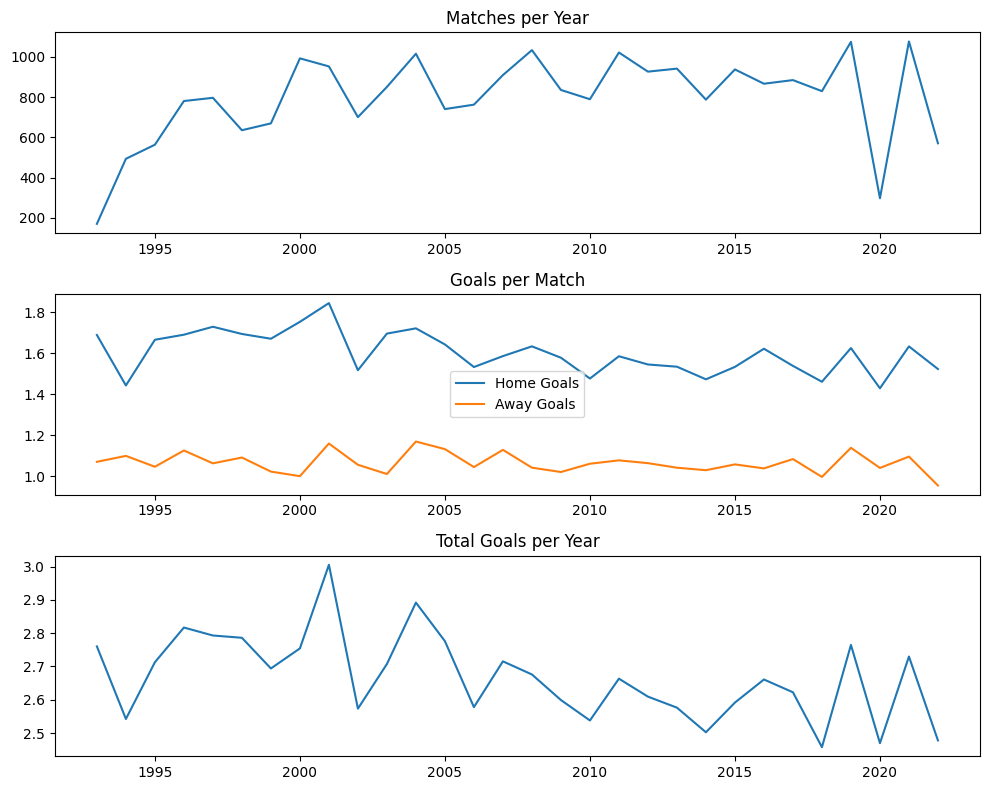

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(data_set_yr['matches'])
axs[0].set_title('Matches per Year')
axs[1].plot(data_set_yr['home_goals'], label='Home Goals')
axs[1].plot(data_set_yr['away_goals'], label='Away Goals')
axs[1].legend()
axs[1].set_title('Goals per Match')
axs[2].plot(data_set_yr['home_goals'] + data_set_yr['away_goals'])
axs[2].set_title('Total Goals per Year')
plt.tight_layout()
plt.show()

In [ ]:
data_set.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
year                     

In [ ]:
null_cols = ['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 
             'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 
             'away_team_mean_offense_score', 'away_team_mean_midfield_score']

In [ ]:
for x in null_cols:
  data_set[x] = data_set[x].fillna(data_set[x].mean())

In [ ]:
data_set.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
year                             0
dtype: int64

Heat map

<ipython-input-15-affa1bbfa74b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_set.corr(), cmap='crest', annot=True)


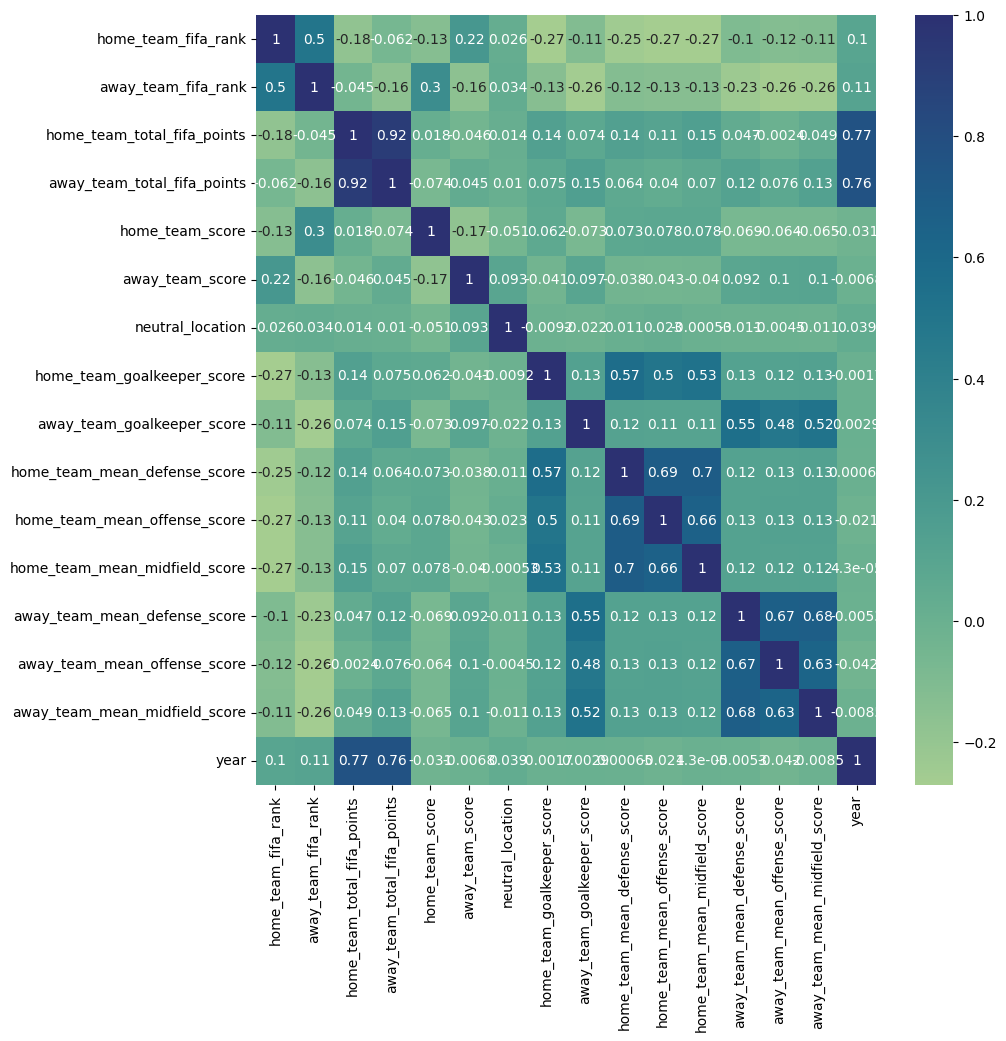

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_set.corr(), cmap='crest', annot=True)
plt.show()

In [ ]:
wrld_cup_data = data_set[data_set["tournament"] == "FIFA World Cup"]

In [ ]:
feat = pd.DataFrame()

In [ ]:
feat["home_team"] = wrld_cup_data["home_team"]
feat["away_team"] = wrld_cup_data["away_team"]
feat["neutral_location"] = wrld_cup_data["neutral_location"]
feat["goalsdifference"] = wrld_cup_data["home_team_goalkeeper_score"] - wrld_cup_data["away_team_goalkeeper_score"]

In [ ]:
feat.head()

,home_team,away_team,neutral_location,goalsdifference
385,Germany,Bolivia,True,0.751361
386,Spain,Korea Republic,True,0.751361
387,Colombia,Romania,True,0.751361
388,Italy,Republic of Ireland,True,0.751361
389,USA,Switzerland,False,0.751361


In [ ]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 385 to 20449
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   home_team         432 non-null    object 
 1   away_team         432 non-null    object 
 2   neutral_location  432 non-null    bool   
 3   goalsdifference   432 non-null    float64
dtypes: bool(1), float64(1), object(2)
memory usage: 13.9+ KB


In [ ]:
import numpy as np

In [ ]:
feat['goalsdifference'] = feat['goalsdifference'].apply(np.ceil)

In [ ]:
feat.head()

,home_team,away_team,neutral_location,goalsdifference
385,Germany,Bolivia,True,1.0
386,Spain,Korea Republic,True,1.0
387,Colombia,Romania,True,1.0
388,Italy,Republic of Ireland,True,1.0
389,USA,Switzerland,False,1.0


In [ ]:
target = []

In [ ]:
for i, row in wrld_cup_data.iterrows():
    if row["home_team"] > row["away_team"]:
        target.append(1)
    elif row["home_team"] < row["away_team"]:
        target.append(0)
    else:
        target.append(0.5)

In [ ]:
feat["target"] = target

In [ ]:
feat.head()

,home_team,away_team,neutral_location,goalsdifference,target
385,Germany,Bolivia,True,1.0,1
386,Spain,Korea Republic,True,1.0,1
387,Colombia,Romania,True,1.0,0
388,Italy,Republic of Ireland,True,1.0,0
389,USA,Switzerland,False,1.0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
feat['home_team'] = le.fit_transform(feat['home_team'])
feat['away_team'] = le.fit_transform(feat['away_team'])
feat['neutral_location'] = le.fit_transform(feat['neutral_location'])

In [ ]:
feat.head()

,home_team,away_team,neutral_location,goalsdifference,target
385,22,6,1,1.0,1
386,54,33,1,1.0,1
387,12,46,1,1.0,0
388,28,45,1,1.0,0
389,61,57,0,1.0,1


In [ ]:
dummy_feat = pd.get_dummies(feat)

In [ ]:
dummy_feat.head()

,home_team,away_team,neutral_location,goalsdifference,target
385,22,6,1,1.0,1
386,54,33,1,1.0,1
387,12,46,1,1.0,0
388,28,45,1,1.0,0
389,61,57,0,1.0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import *

Splitting the dataset into training and testing with the test size 30%

In [ ]:
X = dummy_feat.drop(['target'], axis=1)
y = feat['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
ly_pred = lr.predict(X_test)

In [ ]:
confusion_matrix(y_test, ly_pred)

array([[29,  0],
       [ 0, 36]])

In [ ]:
lgraccuracy = accuracy_score(y_test, ly_pred)
print("Logistic Regression Accuracy:", lgraccuracy)

Logistic Regression Accuracy: 1.0


In [ ]:
print(classification_report(y_test, ly_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        36

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
ky_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test, ky_pred)

array([[28,  1],
       [ 3, 33]])

In [ ]:
knnaccuracy = accuracy_score(y_test, ky_pred)
print('KNN Accuracy:', knnaccuracy)

KNN Accuracy: 0.9384615384615385


In [ ]:
print(classification_report(y_test, ky_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.92      0.94        36

    accuracy                           0.94        65
   macro avg       0.94      0.94      0.94        65
weighted avg       0.94      0.94      0.94        65



RANDOM FOREST

In [ ]:
rd_model = RandomForestClassifier(n_estimators=15)
rd_model.fit(X_train, y_train)
rypred = rd_model.predict(X_test)

In [ ]:
confusion_matrix(y_test, rypred)

array([[28,  1],
       [ 1, 35]])

In [ ]:
rdf_accuracy = accuracy_score(y_test, rypred)
print("Random Forest Accuracy:", rdf_accuracy)

Random Forest Accuracy: 0.9692307692307692


In [ ]:
print(classification_report(y_test, rypred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.97      0.97      0.97        36

    accuracy                           0.97        65
   macro avg       0.97      0.97      0.97        65
weighted avg       0.97      0.97      0.97        65



Desicion Tree

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split=2, max_depth=10)
dtc.fit(X_train, y_train)
dy_pred = dtc.predict(X_test)

In [ ]:
confusion_matrix(y_test, dy_pred)

array([[28,  1],
       [ 2, 34]])

In [ ]:
dtaccuracy = accuracy_score(y_test, dy_pred)
print("Decision Tree Accuracy:", dtaccuracy)

Decision Tree Accuracy: 0.9538461538461539


In [ ]:
print(classification_report(y_test, dy_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.97      0.94      0.96        36

    accuracy                           0.95        65
   macro avg       0.95      0.95      0.95        65
weighted avg       0.95      0.95      0.95        65



In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz 

[Text(0.4166666666666667, 0.9285714285714286, 'x[0] <= 23.5\ngini = 0.497\nsamples = 367\nvalue = [198, 169]'),
 Text(0.1875, 0.7857142857142857, 'x[1] <= 8.5\ngini = 0.296\nsamples = 166\nvalue = [136, 30]'),
 Text(0.08333333333333333, 0.6428571428571429, 'x[0] <= 4.5\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.041666666666666664, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.2916666666666667, 0.6428571428571429, 'x[1] <= 20.0\ngini = 0.129\nsamples = 144\nvalue = [134, 10]'),
 Text(0.20833333333333334, 0.5, 'x[0] <= 16.0\ngini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[0] <= 9.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.125, 0.21428571428571427, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.20833333333333334, 0.21428571428571427, 'x[1] <= 12.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.16666666666666666, 0.0714285714

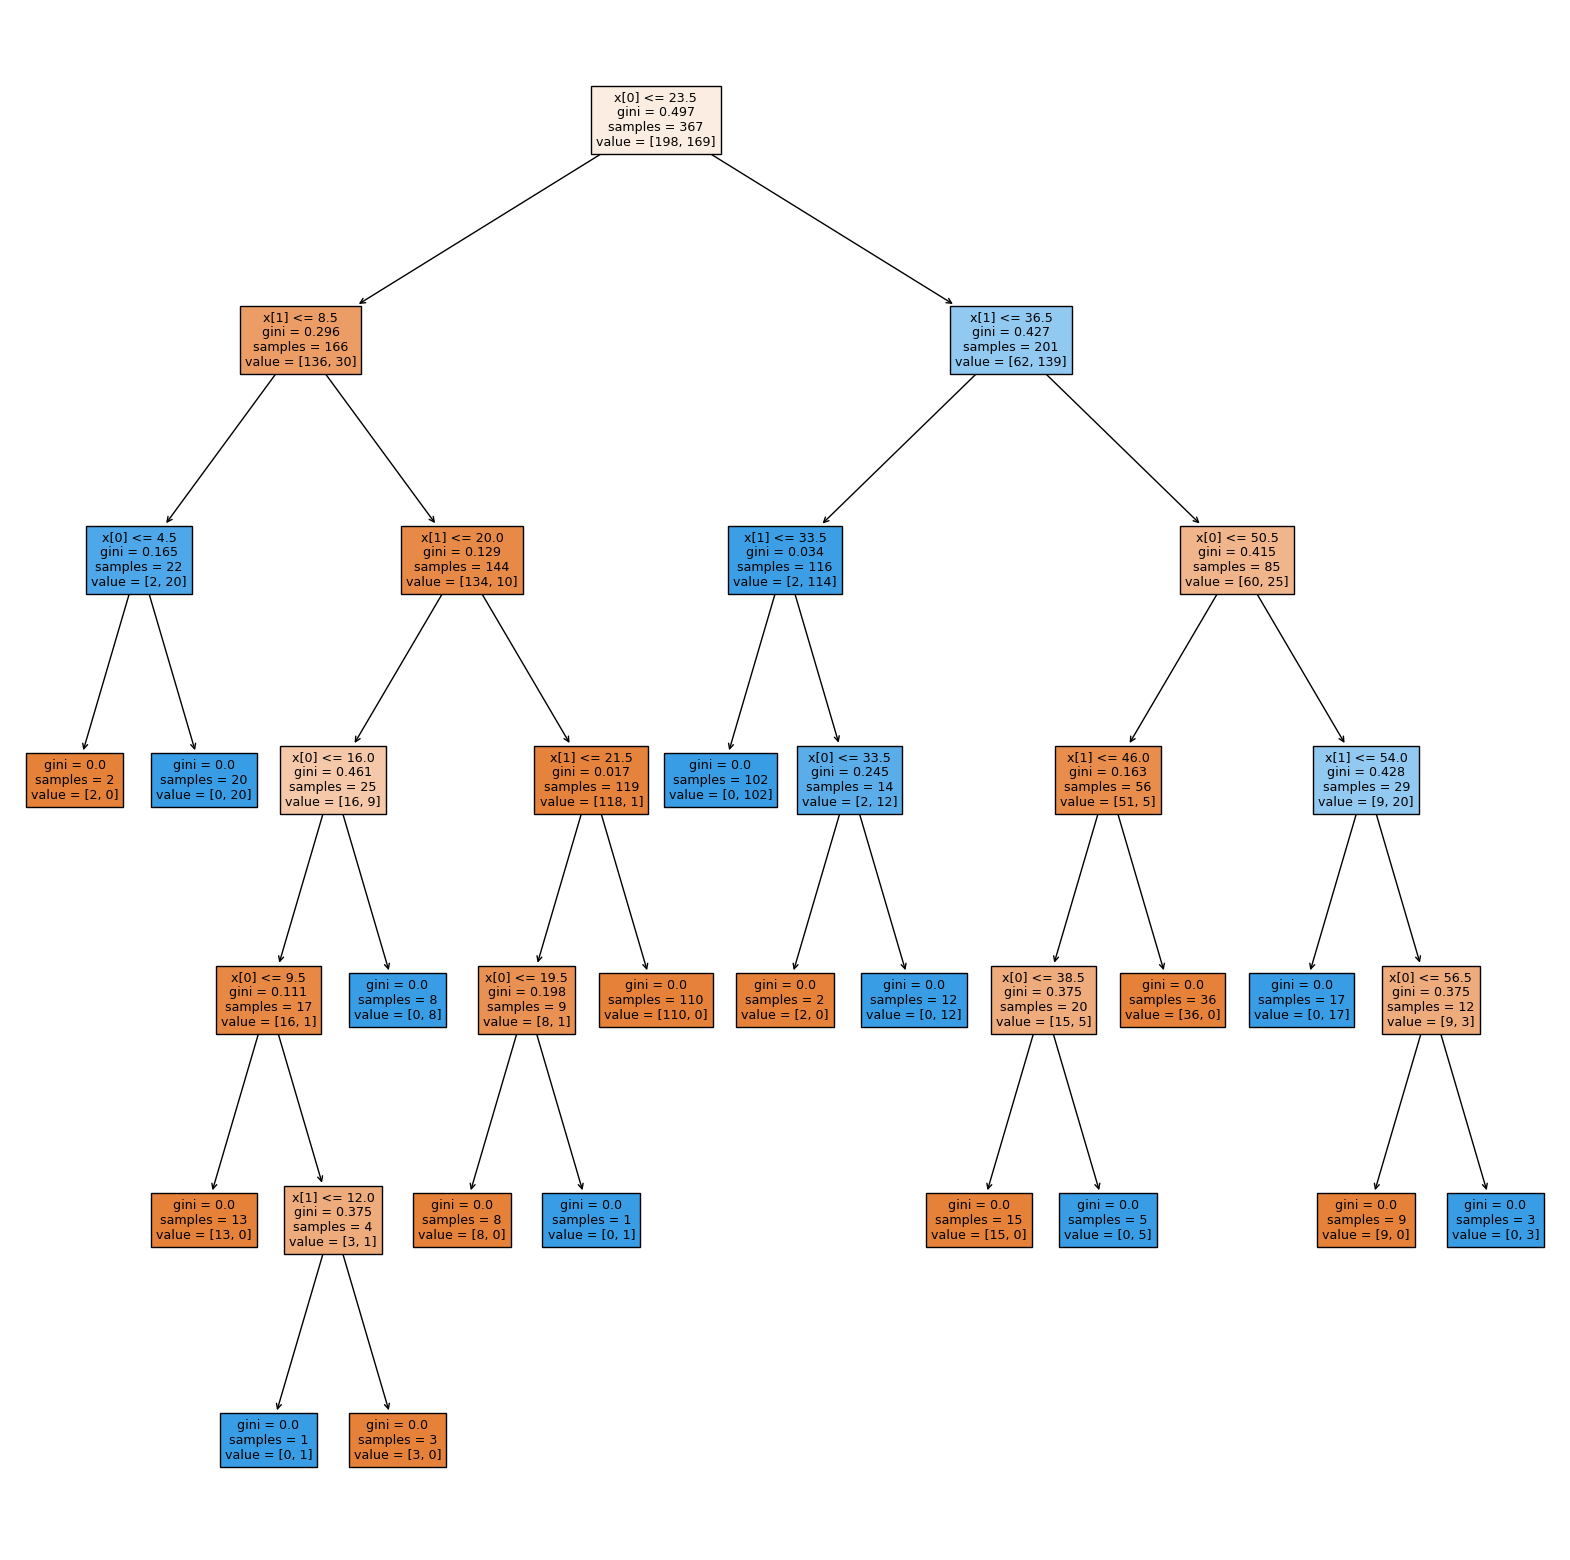

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (20,20))
tree.plot_tree(dtc, filled=True)

In [ ]:
y_prob = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

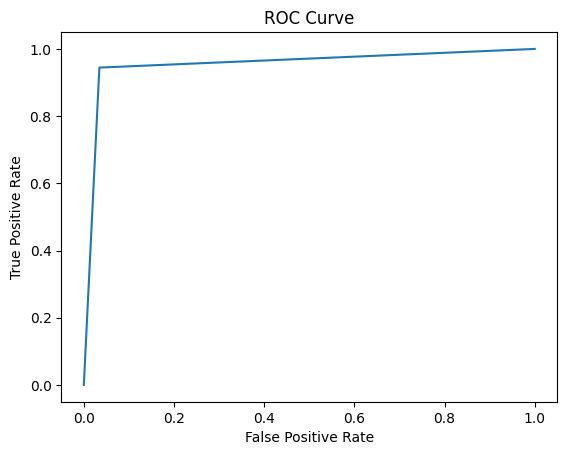

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve') 
plt.show()

In [ ]:
auc_score = roc_auc_score(y_test, y_prob)
print('AUC score: ', auc_score)

AUC score:  0.9549808429118775


SVM 

In [ ]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
sy_pred = svm_clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, sy_pred)

array([[29,  0],
       [ 0, 36]])

In [ ]:
svmaccuracy = accuracy_score(y_test, sy_pred)
print("SVM Accuracy:", svmaccuracy)

SVM Accuracy: 1.0


In [ ]:
print(classification_report(y_test,sy_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        36

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [ ]:
print("Logistic Regression Accuracy:", (lgraccuracy)*100)
print('KNN Accuracy:', (knnaccuracy)*100)
print("Random Forest Accuracy:", (rdf_accuracy)*100)
print("Decision Tree Accuracy:", (dtaccuracy)*100)
print("SVM Accuracy:", (svmaccuracy)*100)

Logistic Regression Accuracy: 100.0
KNN Accuracy: 93.84615384615384
Random Forest Accuracy: 96.92307692307692
Decision Tree Accuracy: 95.38461538461539
SVM Accuracy: 100.0


In [ ]:
import joblib
joblib.dump(dtc, 'fifa_model.joblib')

['fifa_model.joblib']

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.3 MB/s eta 0:00:00
  Preparing metad

INTERFACE

In [ ]:
import gradio as gr
import numpy as np
import joblib
from gradio.components import *
from sklearn.preprocessing import LabelEncoder

model = joblib.load('fifa_model.joblib')

options = ['Germany', 'Spain', 'Colombia', 'Italy', 'USA', 'Belgium', 'Cameroon', 'Norway', 'Brazil', 'Netherlands', 'Argentina', 'Nigeria', 'Romania', 'Korea Republic',
 'Mexico', 'Sweden', 'Saudi Arabia', 'Bulgaria', 'Switzerland', 'Bolivia', 'Republic of Ireland', 'Russia', 'Morocco', 'Greece', 'France', 'Paraguay', 'Jamaica',
 'England', 'Scotland', 'Chile', 'South Africa', 'Japan', 'Uruguay', 'Croatia', 'China PR', 'Denmark', 'Costa Rica', 'Portugal', 'Tunisia', 'Senegal', 'Slovenia',
 'Ecuador', 'Turkey', 'Poland', 'Trinidad and Tobago', 'Angola', 'Serbia', 'Australia', 'Czech Republic', 'Togo', 'IR Iran', "Côte d'Ivoire", 'Ghana', 'Ukraine',
 'Algeria', 'New Zealand', 'Honduras', 'Slovakia', 'Korea DPR', 'Bosnia and Herzegovina', 'Egypt', 'Peru', 'Iceland', 'Panama', 'Canada']
options2 = ['False', 'True']

encoder = LabelEncoder()
encoder.fit(options)
en = LabelEncoder()
en.fit(options2)               

# Define a function to make predictions using the model
def predict(team1, team2, neutral, gd):
    input_data = np.array([encoder.transform([team1])[0], encoder.transform([team2])[0], en.transform([neutral])[0], gd]).reshape(1, -1)
    pred = model.predict(input_data)
    if pred == 1:
      res = team1
    elif pred == 0:
      res = team2 
    else:
      res = 'Draw'
    return res
# Create the input interface
team1_input = Dropdown(choices=options, label="Select Team 1")
team2_input = Dropdown(choices=options, label="Select Team 2")
neutral = Dropdown(choices=options2, label="Neutral Location or not")
gd = gr.inputs.Number()


inputs = [team1_input, team2_input, neutral, gd]

# Create the output interface
outputs = gr.outputs.Textbox()

# Create the interface and launch
iface = gr.Interface(fn=predict, inputs=inputs, outputs=outputs)
iface.launch(debug=True) 

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>